In [4]:
# Importing the core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#loading the dataset
df=pd.read_csv('Pistachio_Features_Dataset.csv')
print(df.head())
print(df.tail())

    AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  SOLIDITY  \
0  63391   1568.405    390.3396    236.7461        0.7951  284.0984    0.8665   
1  68358   1942.187    410.8594    234.7525        0.8207  295.0188    0.8765   
2  73589   1246.538    452.3630    220.5547        0.8731  306.0987    0.9172   
3  71106   1445.261    429.5291    216.0765        0.8643  300.8903    0.9589   
4  80087   1251.524    469.3783    220.9344        0.8823  319.3273    0.9657   

   CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  SHAPEFACTOR_1  \
0        73160  0.6394        1.6488     0.3238       0.7278         0.0062   
1        77991  0.6772        1.7502     0.2277       0.7181         0.0060   
2        80234  0.7127        2.0510     0.5951       0.6767         0.0061   
3        74153  0.7028        1.9879     0.4278       0.7005         0.0060   
4        82929  0.7459        2.1245     0.6425       0.6803         0.0059   

   SHAPEFACTOR_2  SHAPEFACTOR_3  SHAPE

In [6]:
#Print the column name of dataset
print(df.columns)
#Total rows and columns in the dataset
print("(Rows, Columns): ",df.shape)
#Check if there is any missing value in the dataset
df.isna().any()

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'Class'],
      dtype='object')
(Rows, Columns):  (2148, 17)


AREA             False
PERIMETER        False
MAJOR_AXIS       False
MINOR_AXIS       False
ECCENTRICITY     False
EQDIASQ          False
SOLIDITY         False
CONVEX_AREA      False
EXTENT           False
ASPECT_RATIO     False
ROUNDNESS        False
COMPACTNESS      False
SHAPEFACTOR_1    False
SHAPEFACTOR_2    False
SHAPEFACTOR_3    False
SHAPEFACTOR_4    False
Class            False
dtype: bool

In [7]:
# Import Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [8]:
print(df['Class'].unique())
# Diving the data into X and y
X=df.iloc[:,0:16].values
y=df.iloc[:,16].values
# Splitting the Data into training And testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

['Kirmizi_Pistachio' 'Siit_Pistachio']


In [9]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver= 'lbfgs',max_iter=500)
lr.fit(X_train, y_train)
Y_pred = lr.predict(X_test)
accuracy_lr=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(lr.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_pred,)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Logistic Regression\n',cm)
print('Accuracy: %.3f' %accuracy)
print('Precision: %.3f' %precision)
print('Recall: %.3f' %recall)
print('f1-score: %.3f' %f1)

Confusion matrix for Logistic Regression
 [[330  44]
 [ 40 231]]
Accuracy: 0.870
Precision: 0.870
Recall: 0.870
f1-score: 0.870


In [10]:
# Naive Bayes classification
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('Accuracy: %.3f' %accuracy)
print('Precision: %.3f' %precision)
print('Recall: %.3f' %recall)
print('f1-score: %.3f' %f1)


Confusion matrix for Naive Bayes
 [[310  64]
 [ 48 223]]
Accuracy: 0.826
Precision: 0.826
Recall: 0.826
f1-score: 0.826


In [11]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test) 
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('Accuracy: %.3f' %accuracy)
print('Precision: %.3f' %precision)
print('Recall: %.3f' %recall)
print('f1-score: %.3f' %f1)

Confusion matrix for DecisionTree
 [[302  72]
 [ 50 221]]
Accuracy: 0.811
Precision: 0.811
Recall: 0.811
f1-score: 0.811


In [12]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_prediction)
accuracy = accuracy_score(y_test,Y_prediction)
precision =precision_score(y_test, Y_prediction,average='micro')
recall =  recall_score(y_test, Y_prediction,average='micro')
f1 = f1_score(y_test,Y_prediction,average='micro')
print('Confusion matrix for Random Forest\n',cm)
print('Accuracy: %.3f' %accuracy)
print('Precision: %.3f' %precision)
print('Recall: %.3f' %recall)
print('f1-score: %.3f' %f1)

Confusion matrix for Random Forest
 [[330  44]
 [ 38 233]]
Accuracy: 0.873
Precision: 0.873
Recall: 0.873
f1-score: 0.873


In [14]:
# Selecting the rows and columns(all rows and 2 colummns named 'perimeter' and 'roundness')
X= df.iloc[:,[1, 10]]
print(X)

      PERIMETER  ROUNDNESS
0     1568.4050     0.3238
1     1942.1870     0.2277
2     1246.5380     0.5951
3     1445.2610     0.4278
4     1251.5240     0.6425
...         ...        ...
2143  1157.1160     0.8070
2144  2327.3459     0.1988
2145  1255.6190     0.8061
2146  1195.2150     0.8569
2147  2356.9080     0.1775

[2148 rows x 2 columns]


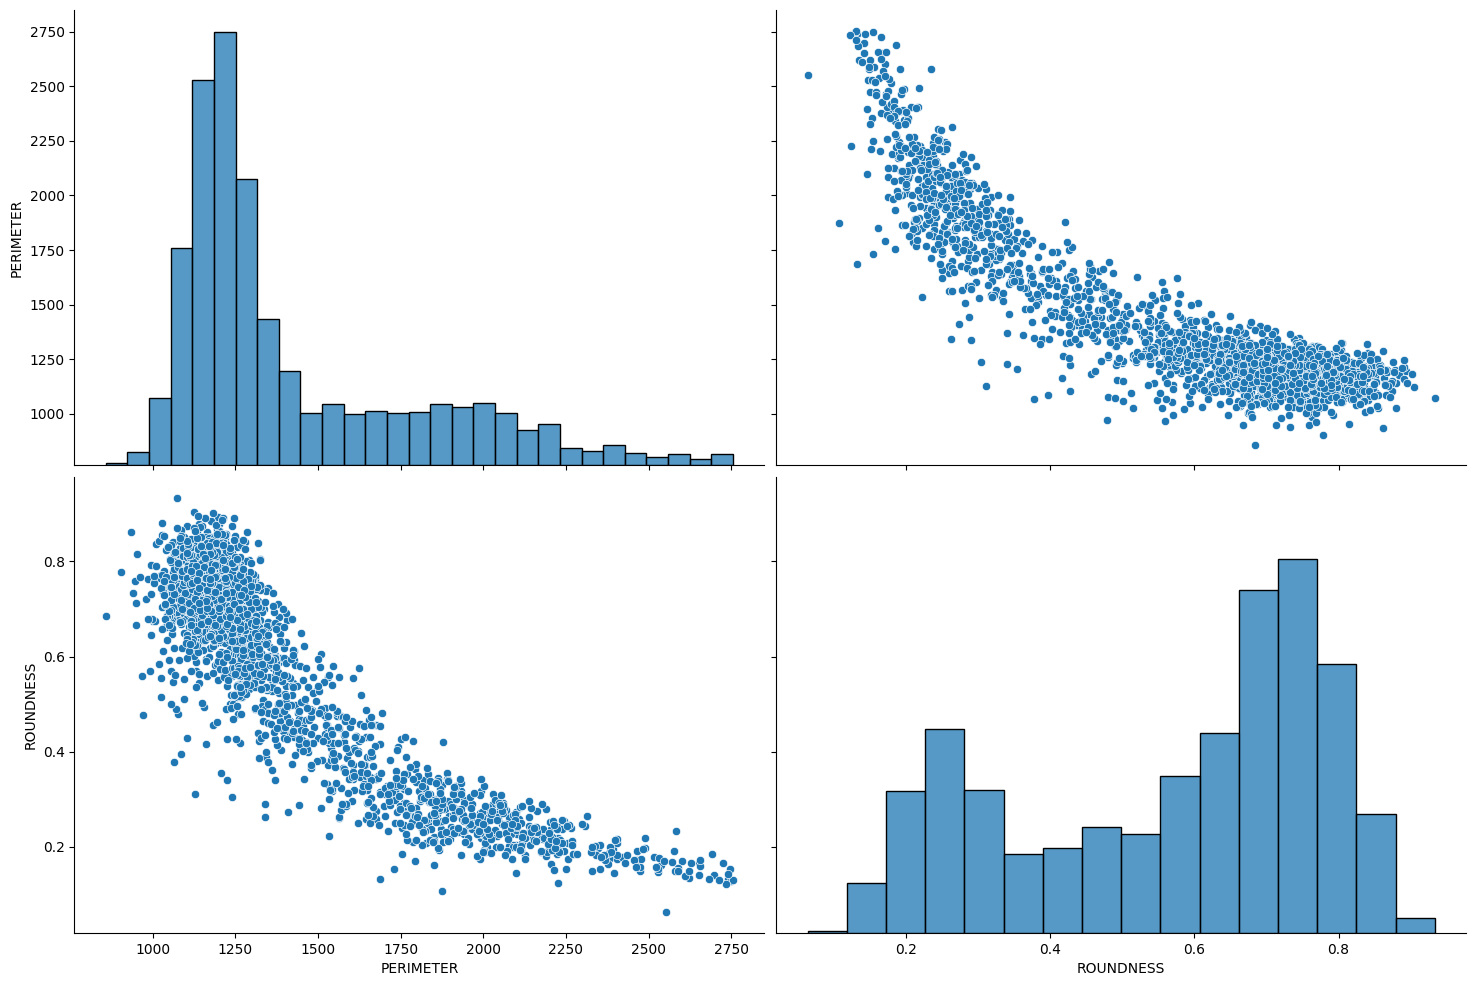

In [15]:
# Visualizing the correlation of data (perimeter and roundness)
import seaborn
seaborn.pairplot(X,height=5, aspect=1.5)